<a href="https://colab.research.google.com/github/bavya-sri/Rasmalai/blob/Final/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
def get_patches(filepath,patch_size,crop_sizes,save_dir=None):
    image = cv2.imread(filepath) 
    filename=filepath.split('/')[-1].split('.')[0]
    height, width , channels= image.shape
    patches = []
    for crop_size in crop_sizes: 
        crop_h, crop_w = int(height*crop_size),int(width*crop_size)
        image_scaled = cv2.resize(image, (crop_w,crop_h), interpolation=cv2.INTER_CUBIC)
        for i in range(0, crop_h-patch_size+1, patch_size):
            for j in range(0, crop_w-patch_size+1, patch_size):
              x = image_scaled[i:i+patch_size, j:j+patch_size] 

              if save_dir!=None:  
                if not os.path.exists(save_dir):
                  os.mkdir(save_dir)
                pactch_filepath=save_dir+'/'+filename+'_'+str(crop_h)+'_'+str(i)+'_'+str(j)+'.jpg'
                cv2.imwrite(pactch_filepath,x) 

              patches.append(x)
    return patches

In [3]:
def create_data(data_dir,save_dir=None):
  '''This function create data for all the images present in a directory'''
  files_list=os.listdir(data_dir)
  print('Number of files in the '+data_dir+' is : '+str(len(files_list)))
  patch_size = 40
  crop_sizes = [1, 0.8, 0.7,0.5]
  data=[]
  for file in files_list:
    if file.endswith('.jpg'):
      patches=get_patches(data_dir+'/'+file,patch_size,crop_sizes,save_dir)
      data+=patches
  return data

In [4]:
os.mkdir('/content/drive/MyDrive/DataScience/patches-train/')

In [5]:
create_data('/content/drive/MyDrive/DataScience/train','/content/drive/MyDrive/DataScience/patches-train/train')
print('Number of patches obtained from train data : ',len(os.listdir('/content/drive/MyDrive/DataScience/patches-train/train')))

Number of files in the /content/drive/MyDrive/DataScience/train is : 401
Number of patches obtained from train data :  85600


In [4]:
os.mkdir('/content/drive/MyDrive/DataScience/patches-test/')

In [5]:
create_data('/content/drive/MyDrive/DataScience/test','/content/drive/MyDrive/DataScience/patches-test/test')
print('Number of patches obtained from test data : ',len(os.listdir('/content/drive/MyDrive/DataScience/patches-test/test')))

Number of files in the /content/drive/MyDrive/DataScience/test is : 201
Number of patches obtained from test data :  42800


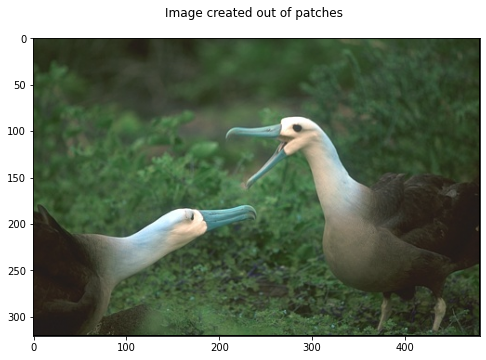

In [6]:
def create_image_from_patches(patches,image_shape):
  '''This function takes the patches of images and reconstructs the image'''
  image=np.zeros(image_shape) 
  patch_size=patches.shape[1]
  p=0
  for i in range(0,image.shape[0]-patch_size+1,patch_size):
    for j in range(0,image.shape[1]-patch_size+1,patch_size):
      image[i:i+patch_size,j:j+patch_size]=patches[p] 
      p+=1
  return np.array(image)

# We create patches from images before starting reconstruction . Note: Use crop_size=1 
patches=get_patches("/content/drive/MyDrive/DataScience/test/103029.jpg",40,[1]) 
test_image=cv2.imread('/content/drive/MyDrive/DataScience/test/103029.jpg')
patches=np.array(patches)
image_created=create_image_from_patches(patches,test_image.shape)
fig= plt.figure(figsize=(8,8))
plt.imshow(image_created/255.)
plt.title('Image created out of patches \n')
plt.show()

# New Section